In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#ordinal encoding
# with open-source packages
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

%matplotlib inline 


In [ ]:
plt.rcParams['figure.figsize']=(8,8)

In [ ]:
#1. Get your Dataset 
def getData():
    cols=['symboling','stroke','compressionratio','citympg','enginelocation','aspiration']
    df=pd.read_csv('https://raw.githubusercontent.com/univai-ghf/FeatureProcessingAndSelectionWorkshop/main/Data/Nandata1.csv',usecols=cols)
    return df

#1.1 Read the Dataset From the function above
df= getData()   #Your Code Here



#1.2 View the first five rows of your Data set 
df.head()
 #Your Code Here

,symboling,aspiration,enginelocation,stroke,compressionratio,citympg
0,3.0,std,front,2.68,9.0,21.0
1,3.0,std,front,2.68,9.0,21.0
2,1.0,std,front,3.47,NaN,19.0
3,2.0,std,front,3.40,10.0,24.0
4,NaN,std,NaN,3.40,8.0,NaN


In [ ]:
#2.1 Print the shape of your data 
 #Your Code Here
print(df.shape)

#2.2 Check for missing values in your data 

#Your Code Here
df.info()

(205, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         168 non-null    float64
 1   aspiration        185 non-null    object 
 2   enginelocation    185 non-null    object 
 3   stroke            185 non-null    float64
 4   compressionratio  168 non-null    float64
 5   citympg           185 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.7+ KB


In [ ]:
#3.1 Check the Cardinality of the Data 
df.nunique()
#Your code Here

symboling            6
aspiration           2
enginelocation       2
stroke              35
compressionratio    30
citympg             28
dtype: int64

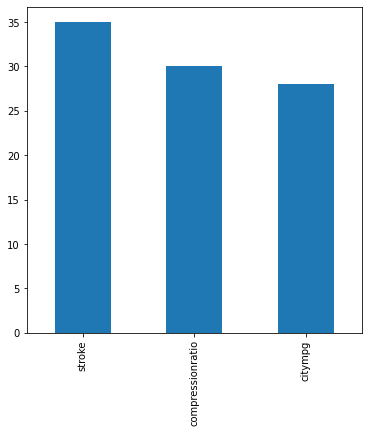

In [ ]:
#4.1 Check Distribution of the columns stroke,compressionratio,citympg
df[['stroke', 'compressionratio', 'citympg']].nunique().plot.bar(figsize = (6, 6))
#Your code Here

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

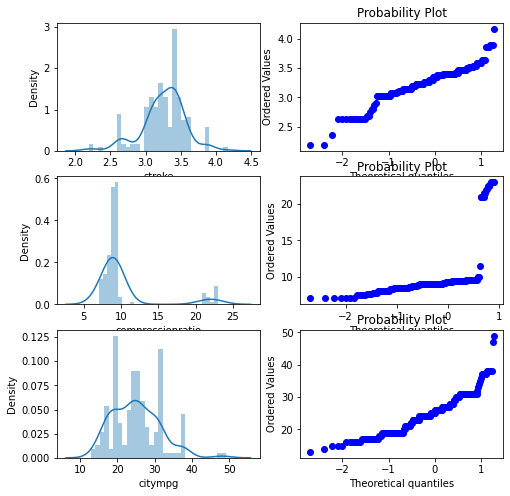

In [ ]:
#4.2 Plot Q-Q plots for each variable and infer if they follow a normal distribution or not

#Your Code Here
fig, axs = plt.subplots(3, 2)

for i, fea in enumerate(['stroke', 'compressionratio', 'citympg'], 0):
  sns.distplot(df[fea], bins=30, label=fea, ax=axs[i][0])
  stats.probplot(df[fea], dist="norm", plot=axs[i][1])


In [ ]:
#5.1) Impute the missing values in categorical variables('aspiration','enginelocation') using SimpleImputer.set the argument "strategy" = 'most_frequent'.


categorical_cols = ['aspiration','enginelocation']

#your code here 

categorical_imputer =  SimpleImputer(strategy='most_frequent')# use simple imputer 

#fit categorical imputer on categorical columns
categorical_imputer.fit(df[categorical_cols]) #(fit only on categorical data)

#transform categorical columns, and assign the values to df[categorical_cols]
df[categorical_cols] =categorical_imputer.transform(df[categorical_cols])   #transform only on categorical data 


#5.2) Impute the missing values in numerical variables('symboling','stroke','compressionratio','citympg') using SimpleImputer.set the argument "strategy" = 'mean'.

numerical_cols = ['symboling','stroke','compressionratio','citympg']

#your code here 

numerical_imputer = SimpleImputer(strategy = 'mean')  # use simple imputer 

#fit numerical imputer on numerical columns
numerical_imputer.fit(df[numerical_cols]) #(fit only on numerical cols)

#transform numerical columns, and assign the values to df[numerical]
df[numerical_cols] = numerical_imputer.transform(df[numerical_cols])   #transform only on numerical data 

#5.3 Now check the count of missing values in the dataframe again using "df.isnull().sum()". Make sure that there is no missing values present.

#Your Code Here
df.isnull().sum()

symboling           0
aspiration          0
enginelocation      0
stroke              0
compressionratio    0
citympg             0
dtype: int64

In [ ]:
#6.1 Log Transform ['stroke','compressionratio','citympg'] these columns 

#Your Code Here 
df[['stroke','compressionratio','citympg']]=np.log(df[['stroke','compressionratio','citympg']])

#6.2 One Hot Encode ['aspiration','enginelocation'] columns and store in a variable dummy using pandas get_dummies function.
#Concatenate this variable dummy with the dataframe

dummy=pd.get_dummies(df[['aspiration','enginelocation']])

df=pd.concat([df, dummy], axis=1)


#6.2 Drop ['aspiration','enginelocation'] from the Data Frame and save the changes

#Your Code
df.drop(columns = ['aspiration','enginelocation'], inplace=True)


In [ ]:
#7 Print the Final Dataset 

#Your Code Here
df

,symboling,stroke,compressionratio,citympg,aspiration_std,aspiration_turbo,enginelocation_front,enginelocation_rear
0,3.000000,0.985817,2.197225,3.044522,1,0,1,0
1,3.000000,0.985817,2.197225,3.044522,1,0,1,0
2,1.000000,1.244155,2.319120,2.944439,1,0,1,0
3,2.000000,1.223775,2.302585,3.178054,1,0,1,0
4,0.869048,1.223775,2.079442,3.217794,1,0,1,0
...,...,...,...,...,...,...,...,...
200,-1.000000,1.147402,2.251292,3.135494,1,0,1,0
201,-1.000000,1.147402,2.163323,2.944439,0,1,1,0
202,-1.000000,1.054312,2.174752,2.890372,1,0,1,0
203,-1.000000,1.223775,3.135494,3.258097,0,1,1,0


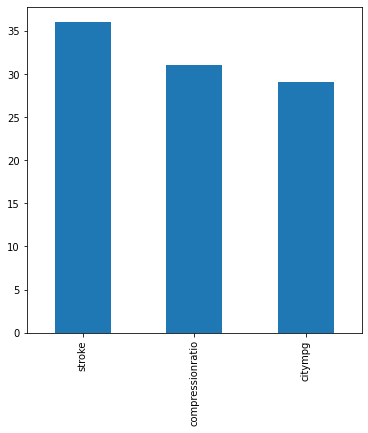

In [ ]:
#8 Repeat 4.1 on the transformed datastet

#Your Code here
df[['stroke', 'compressionratio', 'citympg']].nunique().plot.bar(figsize = (6, 6))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

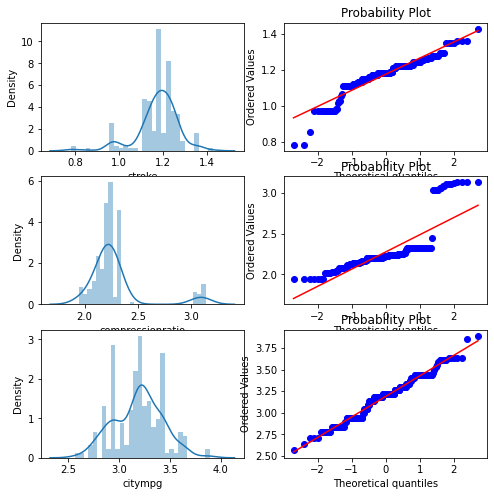

In [ ]:
# I'm adding this extra cell because in 8, I think you meant 4.2, not 4.1.

fig, axs = plt.subplots(3, 2)

for i, fea in enumerate(['stroke', 'compressionratio', 'citympg'], 0):
  sns.distplot(df[fea], bins=30, label=fea, ax=axs[i][0])
  stats.probplot(df[fea], dist="norm", plot=axs[i][1])


In [ ]:
#9 Print the mean of the columns stroke and citympg of the transformed data 

#Your code here 
df['stroke'].mean(), df['citympg'].mean()

(1.1761404017703996, 3.189672068879409)